19BCT0117- Harshini Raju

Air Quality Dataset from UCI
Exploratory Dataset

This dataset is from the UCI machine learning repository and contains hourly averaged responses from an air quality multi-sensor device that was located in a significantly polluted area at road level in an undisclosed Italian city. This data was collected over the course of approx one year (from March 2004 - February 2005)

Dataset attribute information:

* 0 Date (DD/MM/YYYY)
* 1 Time (HH.MM.SS)
* 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
* 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
* 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
* 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
* 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
* 7 True hourly averaged NOx concentration in ppb (reference analyzer)
* 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
* 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
* 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
* 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
* 12 Temperature in Â°C
* 13 Relative Humidity (%)
* 14 AH Absolute Humidity


# DATA PREPROCESSING

In [1]:
# importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

#loading dataset
df = pd.read_csv("../input/datasetucimlairquality/AirQualityUCI.csv", parse_dates={'datetime': ['Date', 'Time']})

df.head()

,datetime,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,2004-11-23 19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,2004-11-23 20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,2004-11-17 18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,2004-11-23 18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,2004-11-26 18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [2]:
# information about the dataset

df.info(), df.shape     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      9357 non-null   datetime64[ns]
 1   CO_GT         9357 non-null   float64       
 2   PT08_S1_CO    9357 non-null   int64         
 3   NMHC_GT       9357 non-null   int64         
 4   C6H6_GT       9357 non-null   float64       
 5   PT08_S2_NMHC  9357 non-null   int64         
 6   Nox_GT        9357 non-null   int64         
 7   PT08_S3_Nox   9357 non-null   int64         
 8   NO2_GT        9357 non-null   int64         
 9   PT08_S4_NO2   9357 non-null   int64         
 10  PT08_S5_O3    9357 non-null   int64         
 11  T             9357 non-null   float64       
 12  RH            9357 non-null   float64       
 13  AH            9357 non-null   float64       
 14  CO_level      9357 non-null   object        
dtypes: datetime64[ns](1), float64(5), int6

(None, (9357, 15))

In [3]:
# finding the values with respect to CO level

df.describe(), df['CO_level'].value_counts()

(             CO_GT   PT08_S1_CO      NMHC_GT      C6H6_GT  PT08_S2_NMHC  \
 count  9357.000000  9357.000000  9357.000000  9357.000000   9357.000000   
 mean    -34.207524  1048.990061  -159.090093     1.865683    894.595276   
 std      77.657170   329.832710   139.789093    41.380206    342.333252   
 min    -200.000000  -200.000000  -200.000000  -200.000000   -200.000000   
 25%       0.600000   921.000000  -200.000000     4.000000    711.000000   
 50%       1.500000  1053.000000  -200.000000     7.900000    895.000000   
 75%       2.600000  1221.000000  -200.000000    13.600000   1105.000000   
 max      11.900000  2040.000000  1189.000000    63.700000   2214.000000   
 
             Nox_GT  PT08_S3_Nox       NO2_GT  PT08_S4_NO2   PT08_S5_O3  \
 count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
 mean    168.616971   794.990168    58.148873  1391.479641   975.072032   
 std     257.433866   321.993552   126.940455   467.210125   456.938184   
 min    -200.0

In [4]:
# this dataset has missing values labelled with -200 so we have to find the number of missing values and remove them later
columns = {"Date", "Time", "CO_GT", "PT08_S1_CO", "NMHC_GT", "C6H6_GT", "PT08_S2_NMHC", "Nox_GT", "PT08_S3_Nox", "NO2_GT", "PT08_S4_NO2", "PT08_S5_O3", "T", "RH", "AH", "CO_level"}

def findNumOfMissingVals(col):
    allValues = []    
    for column in col:
        val = 0 
        for i in df[column]:
            if i == -200:
                val += 1
        allValues.append(val)                         
    return allValues
values = findNumOfMissingVals(['AH','C6H6_GT','CO_GT','CO_level','datetime','NMHC_GT','NO2_GT','Nox_GT','PT08_S1_CO','PT08_S2_NMHC','PT08_S3_Nox','PT08_S4_NO2','PT08_S5_O3','RH','T'])
valuesMapped = dict(zip(sorted(columns), values))
valuesMapped

{'AH': 366,
 'C6H6_GT': 366,
 'CO_GT': 1683,
 'CO_level': 0,
 'Date': 0,
 'NMHC_GT': 8443,
 'NO2_GT': 1642,
 'Nox_GT': 1639,
 'PT08_S1_CO': 366,
 'PT08_S2_NMHC': 366,
 'PT08_S3_Nox': 366,
 'PT08_S4_NO2': 366,
 'PT08_S5_O3': 366,
 'RH': 366,
 'T': 366}

In [5]:
# from the above result we can see that the column NMHC_GT aone has around 8443 missing values while other columns have lesser values
#so we are dropping the column to prevent too much error
df.drop('NMHC_GT', axis=1, inplace=True)
# Replace -200 with null values.
def replaceValues(value1, value2, df):
    df = df.replace(value1, value2)
    return df

df2 = df.copy()      #copying the original dataframe to new dataframe

df2 = replaceValues(-200, np.nan, df2)      #replacing the missing values labeled with -200

# go through rows and drop rows w/ 1 or more NaN values. 
def dropMissingRows(df):
    df = df.dropna(axis=0)
    return df
    
df2 = dropMissingRows(df2)
df2 = df2.sort_values(by=['datetime'], ascending=True)   #sort dataframe based on date

# checking new data 
df2.head()

,datetime,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
2232,2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,High
3328,2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,High
2908,2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,High
2909,2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,High
4224,2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,High


In [6]:

df2.shape

(6941, 14)

# Scatter Plot

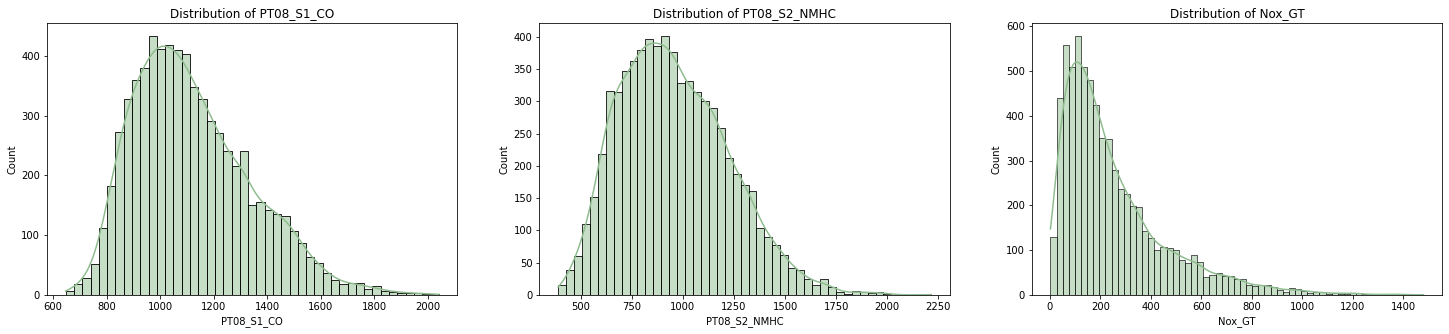

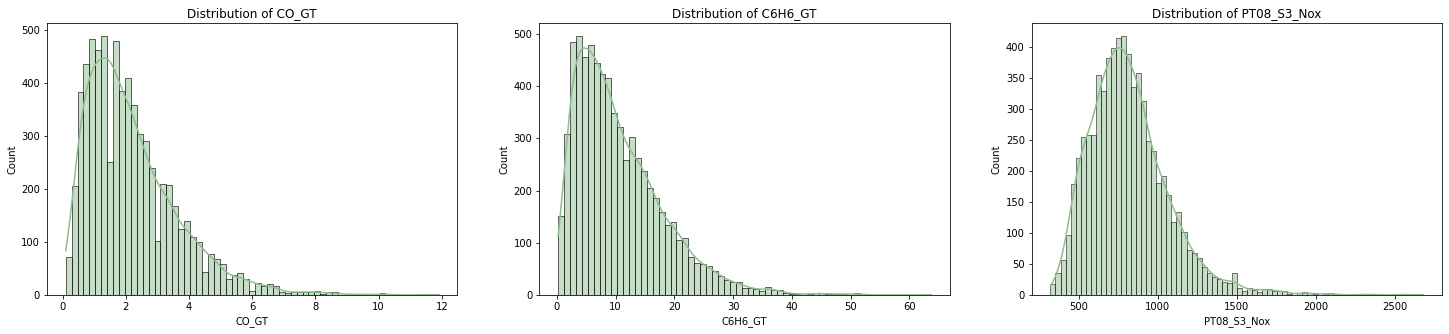

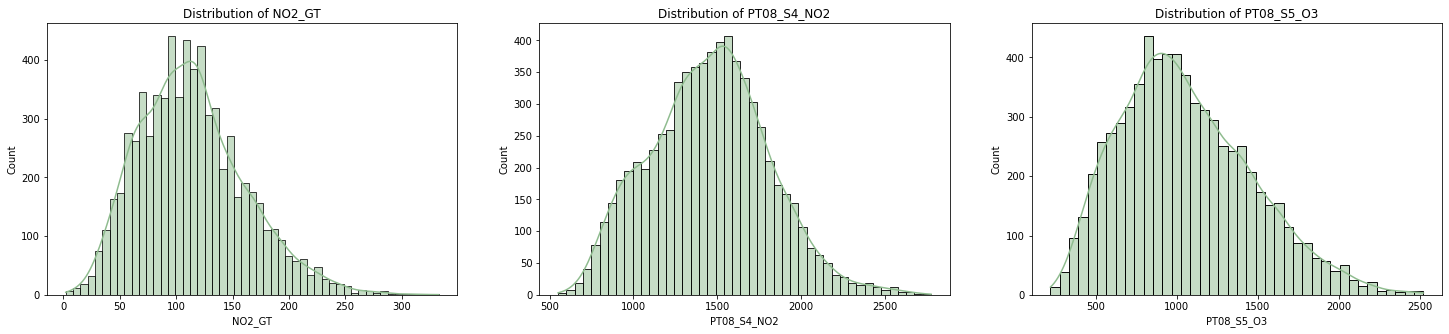

In [7]:
# more data exploration through visualizing
#plotting histograms of each category to idenitfy patterns in the data

def showDistributions(category1, category2, category3):
    fig, axes = plt.subplots(1,3, figsize=(25, 5))
    sns.histplot(data=df2, x=category1, kde=True, color="darkseagreen", ax=axes[0])
    axes[0].set_title("Distribution of {}".format(category1))
    sns.histplot(data=df2, x=category2, kde=True, color="darkseagreen", ax=axes[1])
    axes[1].set_title("Distribution of {}".format(category2))
    sns.histplot(data=df2, x=category3, kde=True, color="darkseagreen", ax=axes[2])
    axes[2].set_title("Distribution of {}".format(category3))

showDistributions("PT08_S1_CO", "PT08_S2_NMHC", "Nox_GT")
showDistributions("CO_GT", "C6H6_GT", "PT08_S3_Nox")
showDistributions("NO2_GT", "PT08_S4_NO2", "PT08_S5_O3")

In [8]:
# data visualization functions

def visualizeScatter(df, x, y, fill, title):
    fig = px.scatter(df, 
    x=x, 
    y=y, 
    color=fill, 
    #     facet_row=fill, 
    title=title)
    
    fig.show()

def visualizeFilledArea(x, y, fill, hd):
    fig = px.area(df, 
    x=x, 
    y=y,
    color=fill,
    hover_data=[hd])
  
    fig.show()

def visualizeLineCharts(df, columns, x1, title):   
    columns = columns 
    
    fig = go.Figure([{
    'x': df[x1],
    'y': df[col],
    'name': col
    }  for col in columns], layout=go.Layout(title=go.layout.Title(text=title)))
    
    fig.show()

def showViolinPlot(x, y, x2, y2, x3, y3):
    fig, axes = plt.subplots(1,3, figsize=(25, 5))
    sns.violinplot(x=x, y=y, data=df2, hue=x, palette='rocket', ax=axes[0])
    axes[0].set_title("{} by {}".format(x, y))

    
    sns.violinplot(x=x2, y=y2, data=df2, hue=x2, palette='rocket', ax=axes[1])
    axes[1].set_title("{} by {}".format(x2, y2))

    
    sns.violinplot(x=x3, y=y3, data=df2, hue=x3, palette='rocket', ax=axes[2])
    axes[2].set_title("{} by {}".format(x3, y3))
    
def displayHeatMap(dim1, dim2, title, df):
    fig=plt.figure(figsize=(dim1,dim2))
    plt.title(title)
    sns.heatmap(df, annot= True, cmap='flare')

# Correlation Heat Map Visualisation

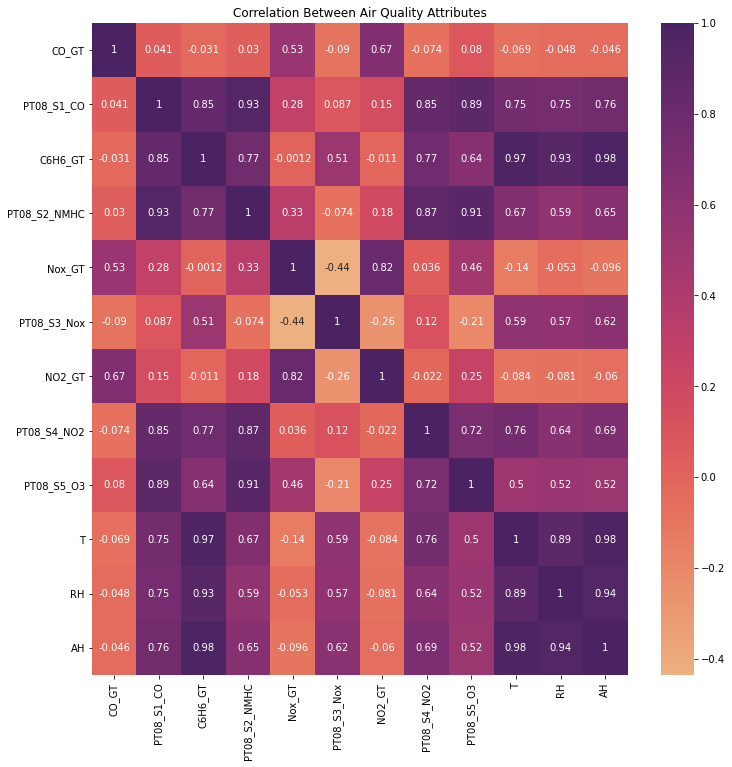

In [9]:
# Correlations between attributes 

corr = df.corr()
displayHeatMap(12, 12, 'Correlation Between Air Quality Attributes', corr)

# **LINE PLOTS**

In [10]:
# Air pollutants concentrations change over time span of 24 hours (2004-03-11)

twentyFourHrSpanDf = df2[6:28].copy()

visualizeLineCharts(twentyFourHrSpanDf, ['CO_GT', 'C6H6_GT', 'Nox_GT', 'NO2_GT'], 'datetime', "Air Pollutant Concentrations Change Over 2004-03-11")

**Changes in one day**

In [11]:
# hourly averaged air pollutants concentrations change over first day in dataset (2004-03-10)

firstDaydf = df2[:6].copy()
visualizeLineCharts(firstDaydf, ['CO_GT', 'C6H6_GT', 'Nox_GT', 'NO2_GT'], 'datetime', "Air Pollutant Concentrations Change Over 2004-03-10")

# hourly averaged NO2 concentration in microg/m^3 change over the near end of last day in dataset (2005-04-04) 
lastDaydf = df[9343: -8].copy() # <- When dropping the rows w/ -200 values tagged, it dropped more recent dates than I would've liked so new df creation dropping CO_GT column.
lastDaydf.drop('CO_GT', axis=1, inplace=True)

visualizeLineCharts(lastDaydf, ['C6H6_GT', 'Nox_GT', 'NO2_GT'], 'datetime', "Air Pollutant Concentrations change over 2005-03-13")

**Changes of pollutant  in one week**

In [12]:
# change over 1 entire week in june (2004-06-07) 
dfWeekday = df['datetime'].dt.day_name()
df['week_day'] = dfWeekday
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',  'Friday',   'Saturday',  'Sunday']
def createSub(lst, col):
    for i in df.index:
        test_days = list(df[col][i:i+7])
        if test_days == lst:
            week_df = df.iloc[i:i+7,:]
            break
    return week_df
        
week_df = createSub(days, 'week_day')    
visualizeLineCharts(week_df, ['C6H6_GT', 'Nox_GT', 'NO2_GT'], 'datetime', "Air Pollutant Concentrations change over 1 week")

# SCATTER PLOT

In [13]:
# change in concentrations over temp, relative humidity, absolute humidity

visualizeScatter(df2, 'RH', 'T', 'RH', 'Concentrations over Temperature and Relative Humidity')

In [14]:
visualizeScatter(df2, 'AH', 'T', 'AH', 'Concentrations over Temperature and Absolute Humidity')

In [15]:
# Concentrations of CO_level  over the Year

visualizeScatter(df2, 'CO_level', 'datetime', 'CO_level', 'Concentrations of CO_level over the Year')

In [16]:
# first half of year time span of air quality concentrations

def createDataSubset(df, range1, range2):
    first = df[range1:range2]
    return first

In [17]:
visualizeScatter(createDataSubset(df2, 0, 3470), 'datetime', 'Nox_GT', 'Nox_GT', 'Nox_GT Concentrations over First half of year')

In [18]:
# second half of year time span of air quality concentrations

visualizeScatter(createDataSubset(df2, 3470, 6941), 'datetime', 'Nox_GT', 'Nox_GT', 'Nox_GT Concentrations over second half of year')

# VIOLIN PLOT

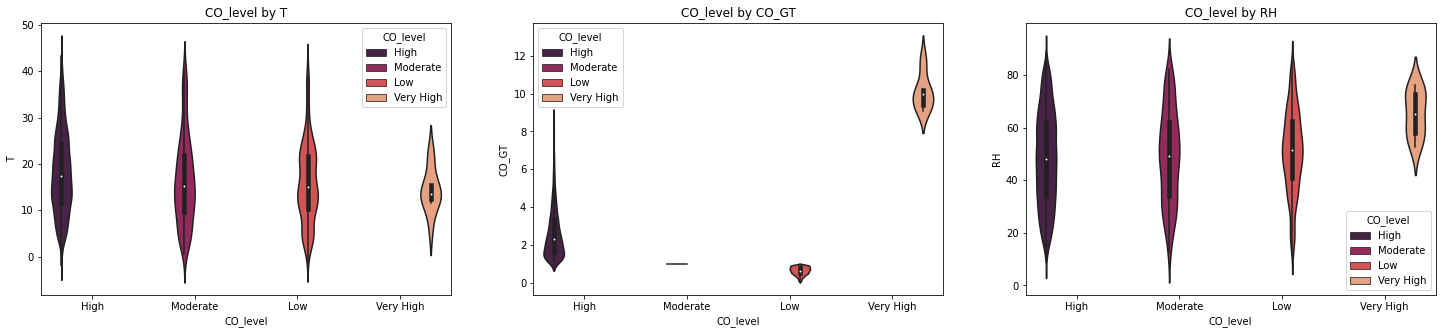

In [19]:
# correlation between temp and CO_level

showViolinPlot('CO_level', 'T', 'CO_level', 'CO_GT', 'CO_level', 'RH')

In [20]:
# full year time span of air quality concentrations (CO_GT, PT08_S1_CO, C6H6_GT)

visualizeLineCharts(df2, ["CO_GT", "PT08_S1_CO", "C6H6_GT"], 'datetime', "1 Year Time Span of Air Concentrations")

In [21]:
# full year time span of air quality concentrations (Nox_GT, PT08_S3_Nox, NO2_GT)

visualizeLineCharts(df2, ["Nox_GT", "PT08_S3_Nox", "NO2_GT"], 'datetime', "1 Year Time Span of Air Concentrations")

# CORRELATION PLOT

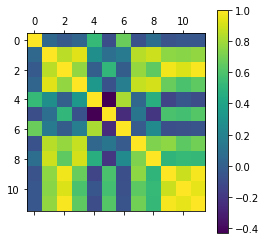

In [22]:
plt.matshow(df.corr())
plt.colorbar()
plt.show()

In [23]:
df.corr()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
CO_GT,1.000000,0.041411,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08_S1_CO,0.041411,1.000000,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
C6H6_GT,-0.031378,0.852687,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08_S2_NMHC,0.029926,0.933102,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
Nox_GT,0.526451,0.277993,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08_S3_Nox,-0.089981,0.087019,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2_GT,0.671127,0.154030,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08_S4_NO2,-0.073724,0.845149,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08_S5_O3,0.080310,0.892434,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467
T,-0.068939,0.754844,0.971375,0.669025,-0.138452,0.588111,-0.084104,0.755060,0.503700,1.000000,0.885911,0.981001


In [24]:
#creating linear model
from sklearn.model_selection import train_test_split
X=df[['CO_GT', 'PT08_S1_CO',	'C6H6_GT',	'PT08_S2_NMHC',	'Nox_GT',	'PT08_S3_Nox',	'NO2_GT',	'PT08_S4_NO2',	'PT08_S5_O3',	'T']]
y=df[['RH','AH']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [25]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(normalize="Boolean")
reg.fit(X_train, y_train)

LinearRegression(normalize='Boolean')

In [26]:
y_pred=reg.predict(X_test)
y_pred

array([[62.64993906, -0.22398271],
       [49.94500323,  0.44315156],
       [50.77374952,  2.61079587],
       ...,
       [53.37406878,  0.13877872],
       [35.53928256, -0.21519147],
       [28.22500139,  1.44459829]])

In [27]:
#checking accuracy
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9827891021329338


In [28]:
reg.intercept_

array([162.76283008,  21.15290147])

In [29]:
reg.coef_

array([[ 1.78107561e-03,  3.27130075e-03,  3.49603687e+00,
        -1.89975568e-01,  2.61884781e-02, -3.86229914e-02,
        -4.39626420e-02,  5.36185757e-02,  5.98145511e-03,
        -1.50422931e+00],
       [ 5.24359277e-04,  3.49346679e-04,  1.03582993e+00,
        -3.17088616e-02, -1.98674612e-03, -3.48628291e-03,
         2.90078045e-03, -7.08702074e-04,  1.04837719e-03,
         1.01975522e-01]])

In [30]:
#making columns for predicted data
X=df[['CO_GT', 'PT08_S1_CO',	'C6H6_GT',	'PT08_S2_NMHC',	'Nox_GT',	'PT08_S3_Nox',	'NO2_GT',	'PT08_S4_NO2',	'PT08_S5_O3',	'T']]
y_pred_all=reg.predict(X)
df['RH_pred']=y_pred_all[:,0]
df['AH_pred']=y_pred_all[:,1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.



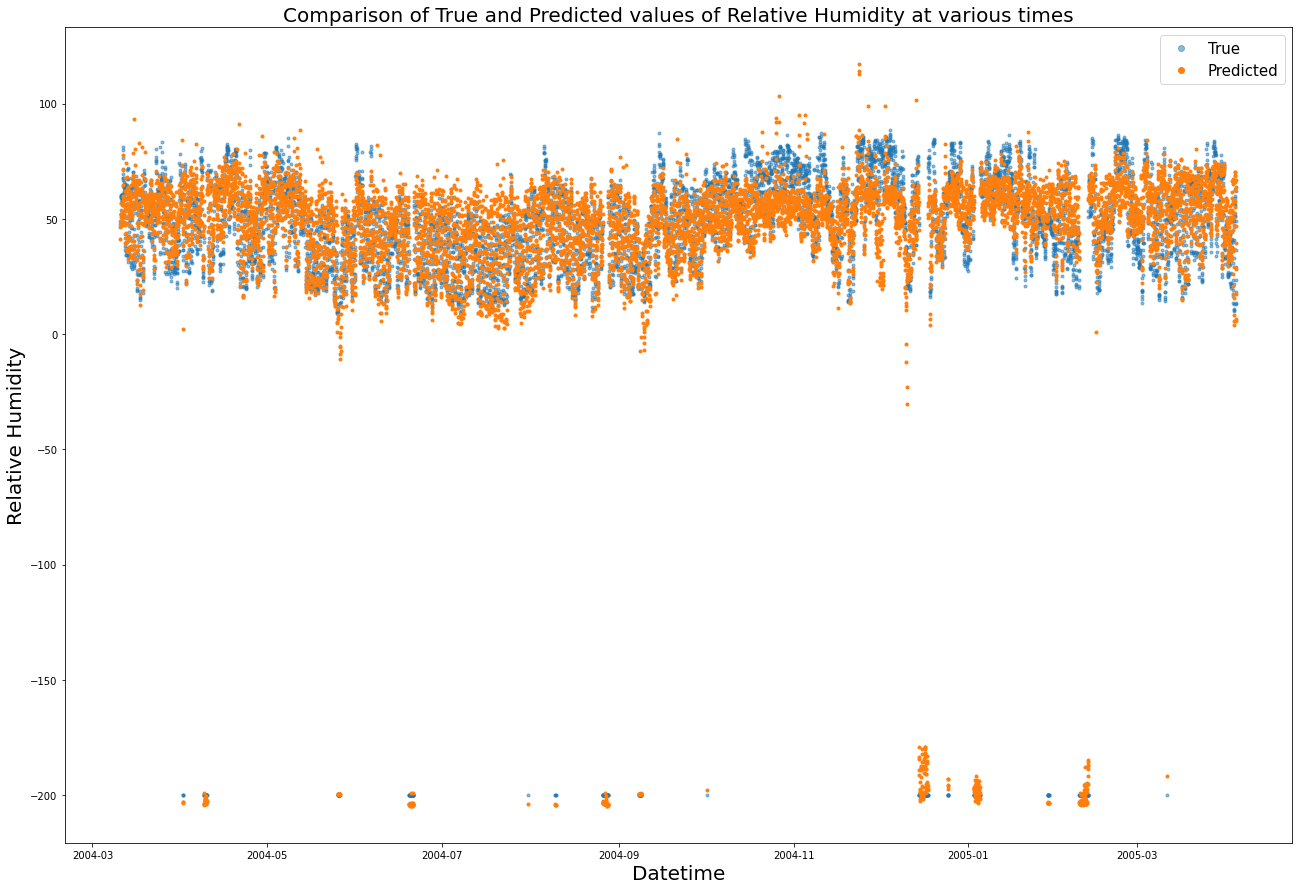

In [31]:
#sklearn model comes out to be inaccurate at some places and it is quite evidient from the r2 score
#RH vs Datetime
plt.figure(figsize=(22,15))
plt.plot_date(df.datetime, df.RH, marker='.', label="True", alpha=0.5)
plt.plot_date(df.datetime, df.RH_pred, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Relative Humidity at various times", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Relative Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.



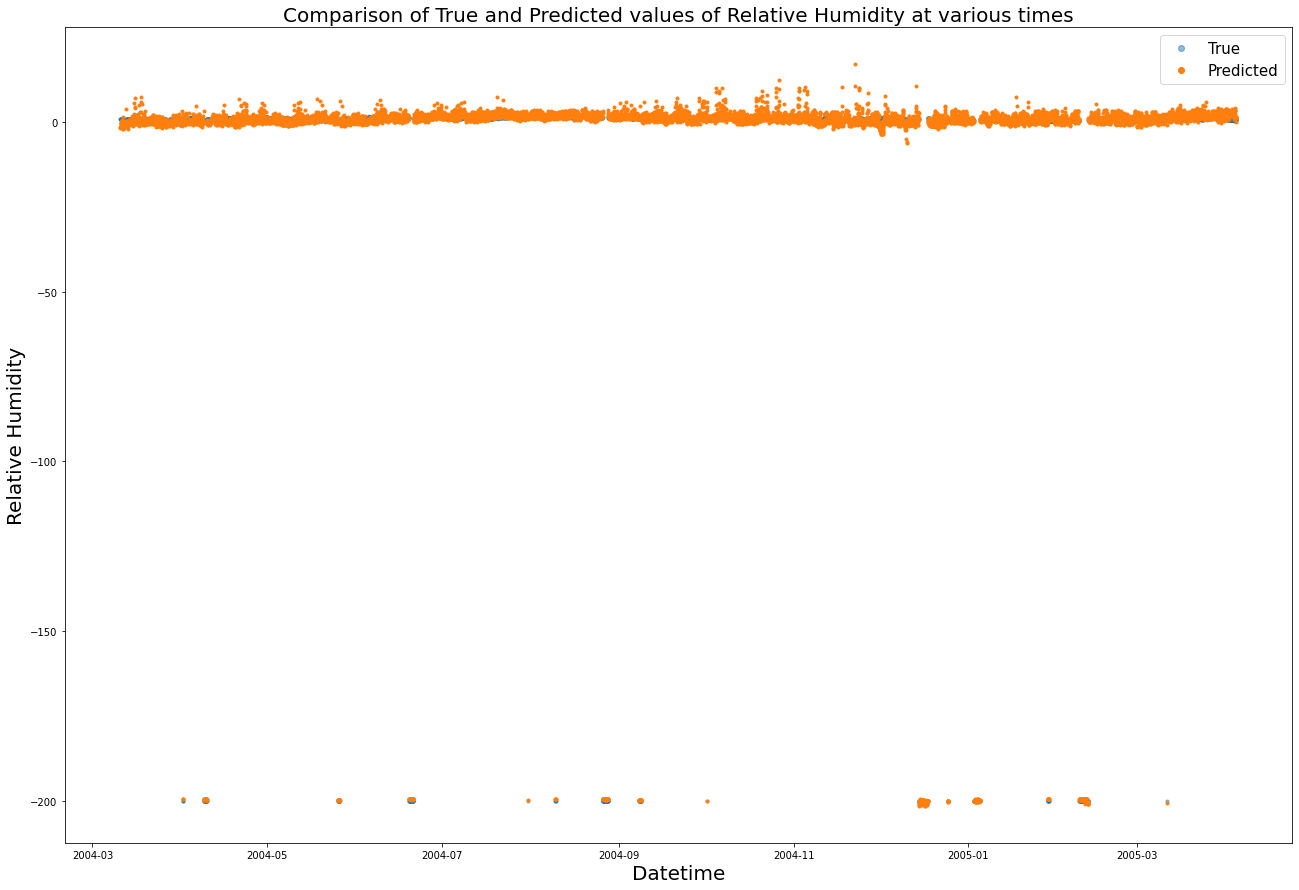

In [32]:
#AH vs Datetime
plt.figure(figsize=(22,15))
plt.plot_date(df.datetime, df.AH, marker='.', label="True", alpha=0.5)
plt.plot_date(df.datetime, df.AH_pred, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Relative Humidity at various times", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Relative Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)

In [33]:
#hyperparameter optimisation
n_estimators=[300]
max_depth=[2,3,4,6,7]
booster=['gbtree']
learning_rate=[0.03, 0.06, 0.1, 0.15, 0.2]
min_child_weight=[4, 5]
base_score=[0.2,0.25, 0.5, 0.75]
hyperparameter_grid={'n_estimators':n_estimators,
                     'max_depth':max_depth,
                     'learning_rate':learning_rate,
                     'min_child_weight':min_child_weight,
                     'booster':booster,
                     'base_score':base_score}

In [34]:
import xgboost
xreg=xgboost.XGBRegressor()  #for RH
xreg1=xgboost.XGBRegressor()  #for AH

In [35]:
#for RH
y1=df[['RH']]
X_train, X_test, y1_train, y1_test=train_test_split(X, y1, test_size=0.2)

In [36]:
from sklearn.model_selection import RandomizedSearchCV
#FOR RH
random_cv1=RandomizedSearchCV(estimator=xreg,
                             param_distributions=hyperparameter_grid,
                             n_iter=10,cv=5,scoring='neg_mean_squared_error')

In [37]:
random_cv1.fit(X_train, y1_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [38]:
random_cv1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
xreg=xgboost.XGBRegressor(base_score=0.2, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, monotone_constraints=None,
             n_estimators=1200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
xreg.fit(X_train, y1_train)

XGBRegressor(base_score=0.2, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=False, verbosity=None)

In [40]:
y1_pred=xreg.predict(X_test)
y1_pred

array([38.166096, 60.52372 , 28.659681, ..., 72.24747 , 40.416576,
       54.91216 ], dtype=float32)

In [41]:
r2_score(y1_test, y1_pred)

0.9921725153659353

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.



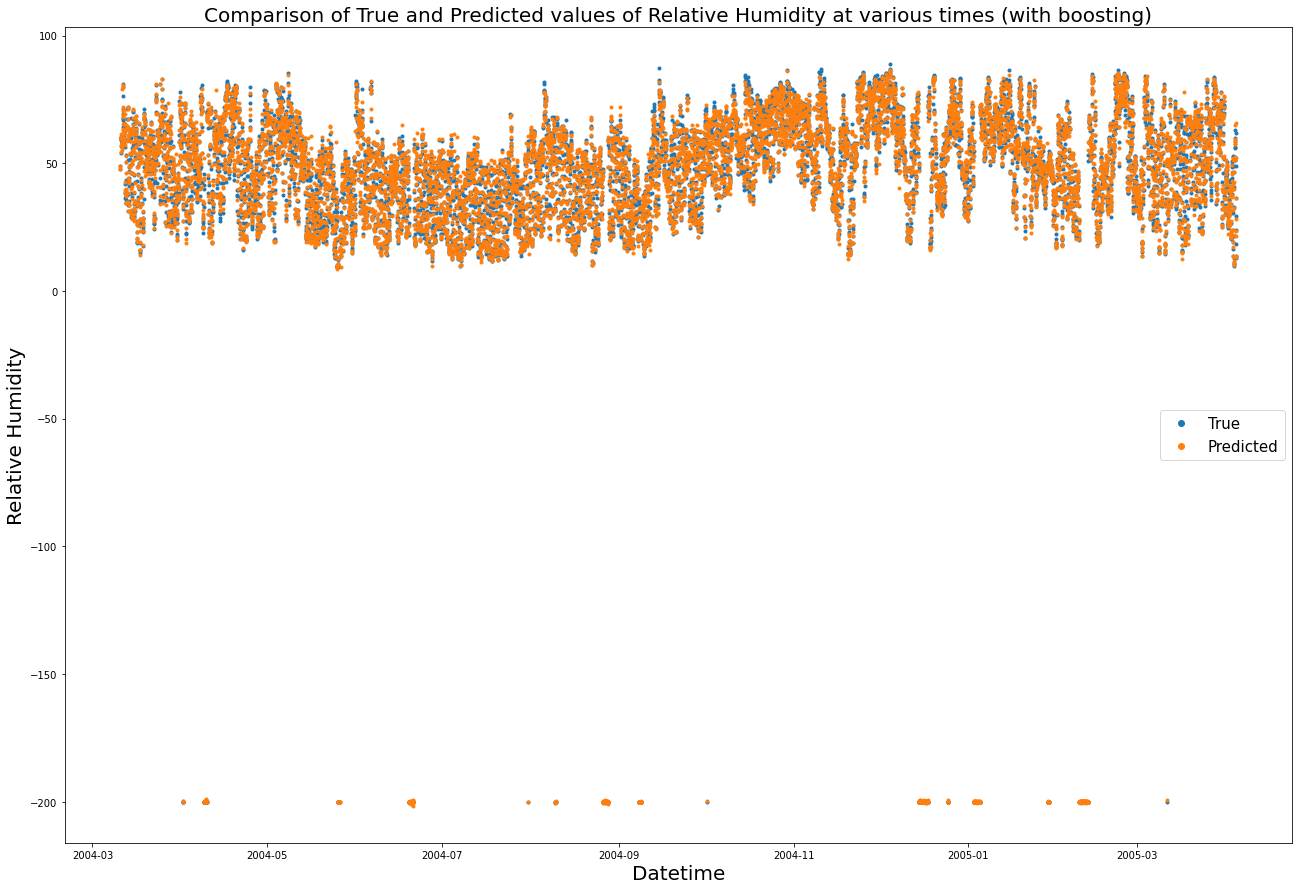

In [42]:
#Plotting
df['RH_pred_xg']=xreg.predict(X)
plt.figure(figsize=(22,15))
plt.plot_date(df.datetime, df.RH, marker='.', label="True")
plt.plot_date(df.datetime, df.RH_pred_xg, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Relative Humidity at various times (with boosting)", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Relative Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)

In [43]:
#for AH
y2=df[['AH']]
X_train, X_test, y2_train, y2_test=train_test_split(X, y2, test_size=0.3)

In [44]:
xreg1=xgboost.XGBRegressor()
random_cv2=RandomizedSearchCV(estimator=xreg,
                             param_distributions=hyperparameter_grid,
                             n_iter=10,cv=5,scoring='neg_mean_squared_error')
random_cv2.fit(X_train, y2_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.2, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=5, min_child_weight=2,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=1200, n_jobs=0,
                                          num_parallel_t...dom_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_weight=1, subs

In [45]:
random_cv2.best_estimator_

xreg1=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.06, max_delta_step=0, max_depth=5,
             min_child_weight=4, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
xreg1.fit(X_train, y2_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.06, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=False, verbosity=None)

In [46]:
y2_pred=xreg1.predict(X_test)
y2_pred

array([1.2586287 , 1.1100513 , 1.5838219 , ..., 0.68947333, 1.7618526 ,
       1.6088972 ], dtype=float32)

In [47]:
r2_score(y2_test, y2_pred)

0.9999940840158488

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.



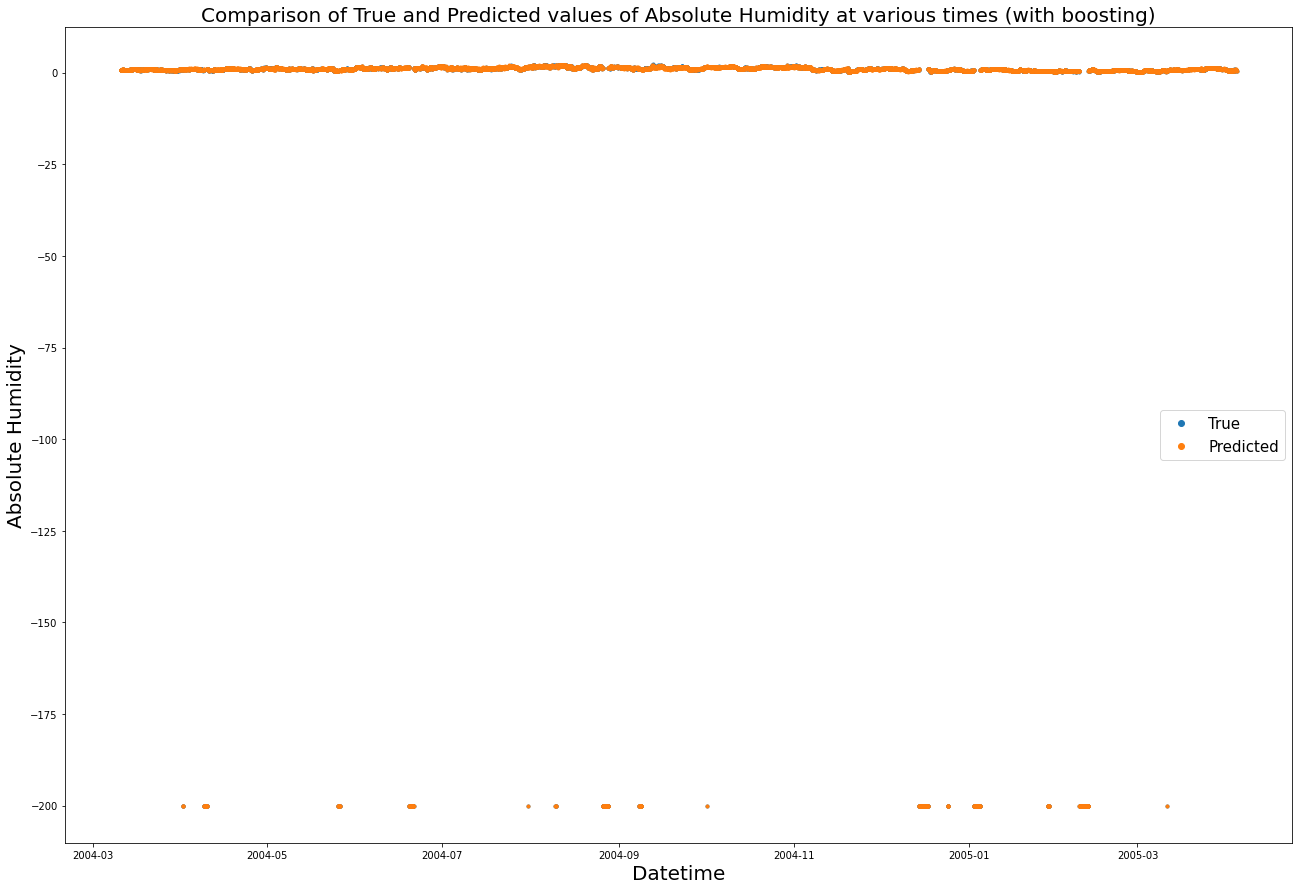

In [48]:
#AH vs Datetime
df['AH_pred_xg']=xreg1.predict(X)
plt.figure(figsize=(22,15))
plt.plot_date(df.datetime, df.AH, marker='.', label="True")
plt.plot_date(df.datetime, df.AH_pred_xg, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Absolute Humidity at various times (with boosting)", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Absolute Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)

In [49]:
# Train the model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_)                                            # Coefficients for Logistic Regression
print(linreg.intercept_)
y_train.shape

[[ 0.00848236 -0.00365187  0.02697319  0.00993684  0.00123445  0.00114909
  -0.00669918 -0.00203145 -0.00236649 -0.01651956]
 [ 0.0044649  -0.0036552   0.04703407  0.00531872  0.00137662  0.00016886
  -0.0040338   0.00031187 -0.00236318 -0.03568537]]
[39.95436637 -5.11342006]


(6549, 2)

In [50]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
def typical_linear_model_performance(y_pred):
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [51]:
#Find the R2 value
from sklearn.model_selection import cross_val_score
def get_cross_value_score(model):
    scores = cross_val_score(model, X_train, y_train,cv=5,scoring='r2')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [52]:
get_cross_value_score(linreg)
typical_linear_model_performance(y_pred)

CV Mean:  -0.003398747361198029
STD:  0.0026273131434659284


MAE: 4.112313832479378
MSE: 50.06208656418941
RMSE: 7.07545663290995


In [53]:
#Build KNN model for the data-set for fun and profit
from sklearn.neighbors import KNeighborsRegressor

clf_knn = KNeighborsRegressor(n_neighbors=10)
clf_knn = clf_knn.fit(X_train,y_train)

y_pred = clf_knn.predict(X_test)

#Measure up how KNN is doing
get_cross_value_score(clf_knn)
typical_linear_model_performance(y_pred)

CV Mean:  -0.10875477324930612
STD:  0.02445657786616736


MAE: 23.321931150284932
MSE: 2593.436662024607
RMSE: 50.92579564449246


In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [55]:
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.model_selection import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #import grid search cv
dt_one_reg=DecisionTreeRegressor()

In [56]:
dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test)            #predict

In [57]:
#calculate RMSE
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 68.36664960558085


In [58]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf_reg=RandomForestRegressor()

In [59]:
rf_model=rf_reg.fit(X_train,y_train)         #fit model   
y_pred_rf=rf_model.predict(X_test)           #predict

In [60]:
#Calculate RMSE
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of predicted RH in RF model: 50.16557016142818


In [61]:
#define rf parameters
rf_params={'n_estimators':[10,20],'max_depth':[8,10],'max_leaf_nodes':[70,90]}
#define rf grid search
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)

In [62]:
rf_model_two=rf_grid.fit(X_train,y_train)     #fit the model wtih all grid parameters

In [63]:
y_pred_rf_two=rf_model_two.predict(X_test)        #predict

In [64]:
#Calculate RMSE
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))

RMSE using RF grid search method 48.70625238602448


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      9357 non-null   datetime64[ns]
 1   CO_GT         9357 non-null   float64       
 2   PT08_S1_CO    9357 non-null   int64         
 3   C6H6_GT       9357 non-null   float64       
 4   PT08_S2_NMHC  9357 non-null   int64         
 5   Nox_GT        9357 non-null   int64         
 6   PT08_S3_Nox   9357 non-null   int64         
 7   NO2_GT        9357 non-null   int64         
 8   PT08_S4_NO2   9357 non-null   int64         
 9   PT08_S5_O3    9357 non-null   int64         
 10  T             9357 non-null   float64       
 11  RH            9357 non-null   float64       
 12  AH            9357 non-null   float64       
 13  CO_level      9357 non-null   object        
 14  week_day      9357 non-null   object        
 15  RH_pred       9357 non-null   float64 

In [66]:
features=list(df.columns)
features.remove('datetime')
features.remove('PT08_S4_NO2')
features.remove('RH_pred')
features.remove('AH_pred')
features.remove('AH_pred_xg')
features.remove('RH_pred_xg')
features.remove('week_day')
features.remove('CO_level')
X = df[features]
y = df['C6H6_GT']
# split dataset to 60% training and 40% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)

(5614, 11) (5614,)


# Decision tree regression

In [67]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 5.775, test: 5.658
R^2 train: 0.997, test: 0.997


# Random forest regression

In [68]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.005, test: 0.014
R^2 train: 1.000, test: 1.000


# Linear Regression

In [69]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared:', regressor.score(X_test, y_test))

R-squared: 1.0


In [70]:
scores = cross_val_score(regressor, X, y, cv=5)
print ("Average of scores: ", scores.mean())
print ("Cross validation scores: ", scores)

Average of scores:  1.0
Cross validation scores:  [1. 1. 1. 1. 1.]


In [79]:
from sklearn.model_selection import *
from sklearn.model_selection import KFold

def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print ("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold( 5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print ("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

# Linear Model

In [80]:
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42)
train_and_evaluate(clf_sgd,X_train,y_train)
print( clf_sgd.coef_)

Coefficient of determination on training set: -4.404170393104958e+25
Average coefficient of determination using 5-fold crossvalidation: -5.350993790541948e+26
[-6.17450404e+11 -8.96856421e+11 -1.20309569e+11 -4.92626501e+10
 -1.17568243e+11  2.49371622e+11  2.39155365e+10  1.01938245e+12
 -1.40673455e+11 -2.06596550e+11 -5.41414360e+11]


In [81]:
clf_sgd1 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2',  random_state=42)
train_and_evaluate(clf_sgd1,X_train,y_train)

Coefficient of determination on training set: -6.381374163038603e+25
Average coefficient of determination using 5-fold crossvalidation: -6.263099835377127e+26


In [82]:
clf_sgd2 = linear_model.SGDRegressor(loss='squared_loss', penalty='l1',  random_state=42)
train_and_evaluate(clf_sgd2,X_train,y_train)

Coefficient of determination on training set: -7.636143432517759e+25
Average coefficient of determination using 5-fold crossvalidation: -1.3130032836973428e+26


# Random Forests for Regression Analysis

In [84]:
from sklearn import ensemble
clf_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(clf_et,X_train,y_train)

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.9999772621174369


In [85]:
imp_features = (np.sort((clf_et.feature_importances_,features),axis=0))

In [86]:
for rank,f in zip(imp_features[0],imp_features[1]):
    print("{0:.3f} <-> {1}".format(float(rank), f))

0.001 <-> CO_GT
0.102 <-> PT08_S1_CO
0.302 <-> C6H6_GT
0.012 <-> PT08_S2_NMHC
0.000 <-> Nox_GT
0.001 <-> PT08_S3_Nox
0.000 <-> NO2_GT
0.099 <-> PT08_S5_O3
0.194 <-> T
0.097 <-> RH
0.194 <-> AH


In [87]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True,
                        show_classification_report=True,
                        show_confusion_matrix=True,
                        show_r2_score=False):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
        
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n")

        
measure_performance(X_test,y_test,clf_et,
                    show_accuracy=False,
                    show_classification_report=False,
                    show_confusion_matrix=False,
                    show_r2_score=True)

Coefficient of determination:1.000 

